In [116]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

data = pd.read_csv("data/adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [117]:

data.info()   #data nemají žádné nulové hodnoty, není třeba nic upravovat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [118]:
data["TOEFL Score"].median()

107.0

In [119]:
data["TOEFL Score"].mean()

107.41

In [120]:
data["TOEFL Score"].var()

36.83899749373433

In [121]:
data.describe()   

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


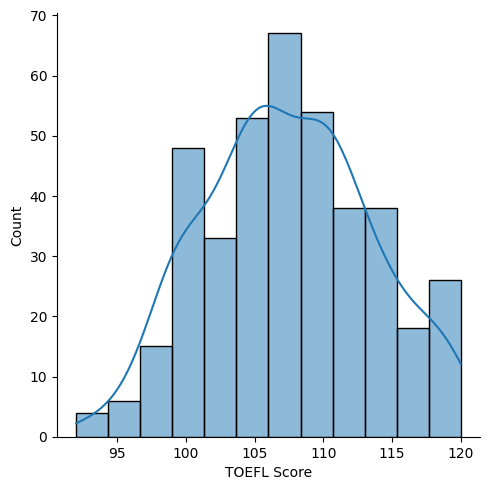

In [123]:
sns.displot(data=data, x="TOEFL Score", kde=True)

Tvar histogramu i odhadovaná křivka napovídá, že by se možná mohlo jednat o normální rozdělení.

H0: data mají normální rozdělení
H1: data nemají normální rozdělění

In [124]:
stats.normaltest(data["TOEFL Score"])

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

Na hladině významnosti 5% musíme zamítnout hypotézu, že data mají normální rozdělení (pvalue<0.05).

In [125]:
data_vyzkum_ano=data[data["Research"]==1]
data_vyzkum_ne=data[data["Research"]==0]
data_vyzkum_ne.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
4,5,314,103,2,2.0,3.0,8.21,0,0.65
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45
15,16,314,105,3,3.5,2.5,8.30,0,0.54


In [126]:
data["Research"].value_counts()

Research
1    219
0    181
Name: count, dtype: int64

In [127]:
data_vyzkum_ano["GRE Score"].mean()

322.85388127853884

In [128]:
data_vyzkum_ne["GRE Score"].mean()

309.49171270718233

In [129]:
stats.normaltest(data_vyzkum_ano["GRE Score"])

NormaltestResult(statistic=10.539299481397224, pvalue=0.005145412486026274)

In [130]:
stats.normaltest(data_vyzkum_ne["GRE Score"])

NormaltestResult(statistic=0.9962407495635873, pvalue=0.6076717821415273)

Na hladině významnosti 5% zamítáme hypotézu o nomálnosti dat (H0: data mají normální rozdělení) v první skupině (studentů, se zkušeností s výzkumem), avšak nemůžeme zamítnout předpoklad, že data v druhé skupině normální rozdělení mají. Použijeme tedy Mann Whithey U test, který nevyžaduje normální rozdělění.
 
H0: průměrné skore v první a druhé skupině se významně neliší. 

H1: průměrné skore se liší

In [131]:
statistics, pvalue = stats.mannwhitneyu(data_vyzkum_ano["GRE Score"], data_vyzkum_ne["GRE Score"])
pvalue

1.1433386421648098e-32

Výsledkem je, že tuto hypotézu musíme zamítnout, vypadá to tedy, že zkušenost s výzkumem má podstatný vliv na výsledek GRE zkoušky.

<Axes: xlabel='TOEFL Score', ylabel='GRE Score'>

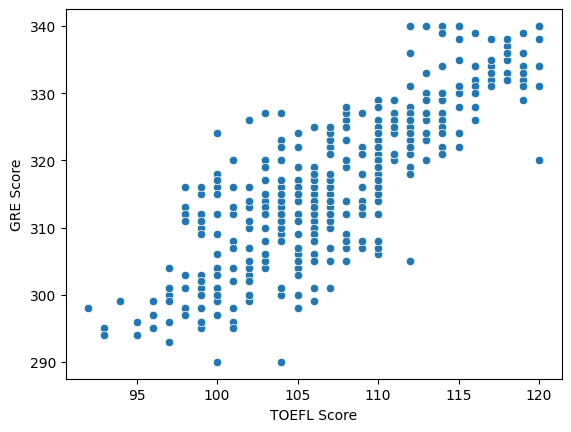

In [132]:
sns.scatterplot(data=data, x="TOEFL Score", y="GRE Score")

In [133]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Výsledky nám ukazují závislost TOEFL a GRE skore. Tato korelace je pozitovní a poměrně vysoká (0.83 je blízké 1), tj. čím vyšší je TOEFL skore, tím vyšší pravděpodobně bude i GRE skore.

In [134]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

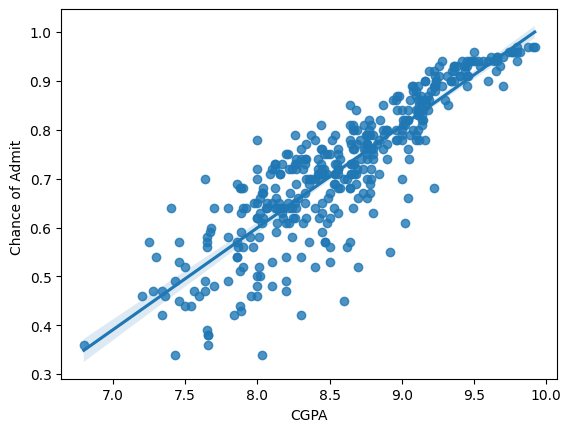

In [135]:
g=sns.regplot(data, x="CGPA", y="Chance of Admit ")

<Axes: xlabel='Chance of Admit '>

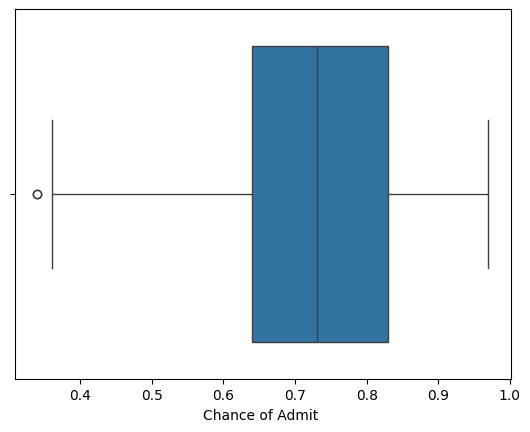

In [136]:
sns.boxplot(data, x="Chance of Admit ")

In [137]:
data[data["Chance of Admit "]<0.35]   # toto jsou odlehlá pozorování

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,93,298,98,2,4.0,3.0,8.03,0,0.34
376,377,297,96,2,2.5,2.0,7.43,0,0.34


In [138]:
data_1=data[data["Chance of Admit "]>0.35]

In [139]:
data_1.columns=data_1.columns.str.replace(' ', '')
data_1.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

In [140]:
formula = "ChanceofAdmit ~ GREScore + TOEFLScore + UniversityRating + SOP + LOR + CGPA + Research"
mod = smf.ols(formula=formula, data=data_1)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.9
Date:                Thu, 02 May 2024   Prob (F-statistic):          3.78e-134
Time:                        22:58:26   Log-Likelihood:                 542.56
No. Observations:                 398   AIC:                            -1069.
Df Residuals:                     390   BIC:                            -1037.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2107      0.123     -9.855      0.000      -1.452      -0.969
GREScore             0.0017      0.001      2.843      0.005       0.001       0.003
TOEFLScore           0.0026      0.001      2.467      0.014       0.001       0.005
UniversityRating     0.0054      0.005      1.147      0.252      -0.004       0.015
SOP                 -0.0003      0.005     -0.063      0.950      -0.011       0.010
LOR                  0.0210      0.005      3.861      0.000       0.010       0.032
CGPA                 0.1190      0.012      9.920      0.000       0.095       0.143
Research             0.0237      0.008      3.040      0.003       0.008       0.039
==============================================================================
Omnibus:                       88.327   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.308
Skew:                          -1.164   Prob(JB):                     9.50e-41
Kurtosis:                       5.386   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Statisticky významné (na hladině 5%) se jeví koeficienty Intercept, GRE a TOEFL Skore, LOR, CGPA a Research. Dává mi to smysl, větší šanci na přijetí mají studenti s dobrými výskledky u jiných zkoušek, vliv má také známka z předchozího studia a zkušenost s výzkumem (do výzkumu se pravděpodobně pustí ti, co jsou nadanější a motivovanější). Podle očekávání nemá na výsledky vliv motivačmí dopis. To, že nemá vliv hodnocení univerzity mě překvapuje. 

Koeficient determinace je vysoký, což svědčí, že model je dobrý. Model poměrně dobře vysvětluje 80% variability šance na přijetí.

In [146]:
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data[data['Cook Distance']>1]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Cook Distance


<Axes: xlabel='Cook Distance', ylabel='Count'>

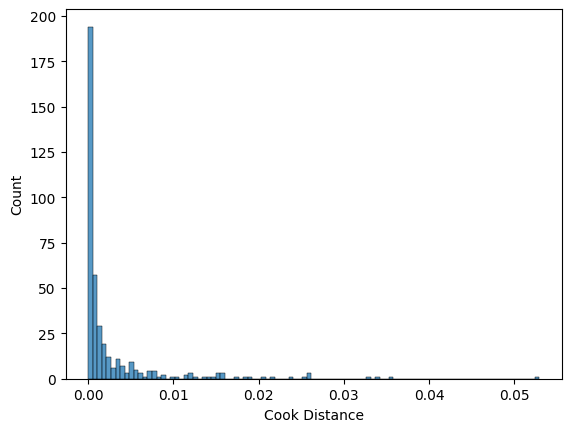

In [151]:
sns.histplot(data=data, x="Cook Distance")

Není třeba žádné body odstraňovat, vzdálenost je pro všechny body menší než 1.